Unique Values in Each Feature:
 {'Company': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object), 'Age': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.]), 'Salary': array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.]), 'Place': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object), 'Country': array(['India'], dtype=object), 'Gender': array([0, 1], dtype=int64)}

Length of Unique Values in Each Feature:
 {'Company': 7, 'Age': 30, 'Sal

C:\Users\User\AppData\Local\Temp\ipykernel_19980\1035769106.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19980\1035769106.py:48: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Age'].fillna(data['Age'].

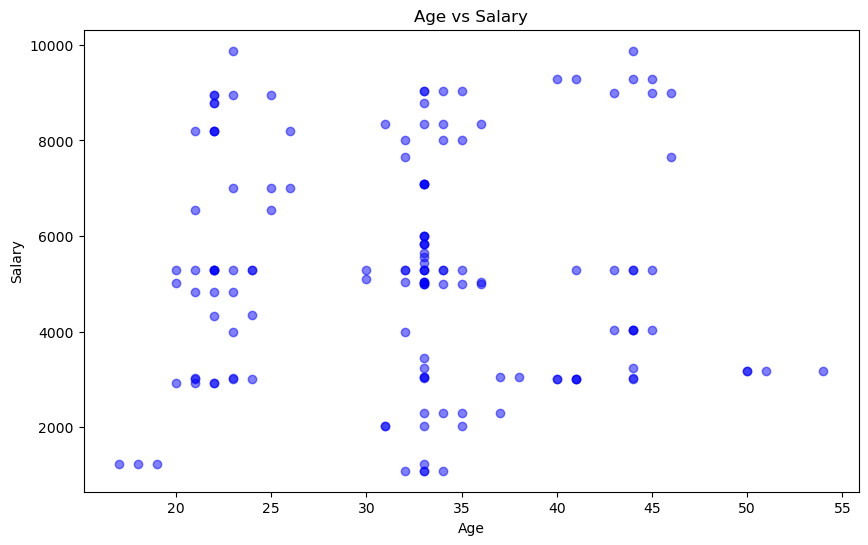


Count of People from Each Place:
 Place
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


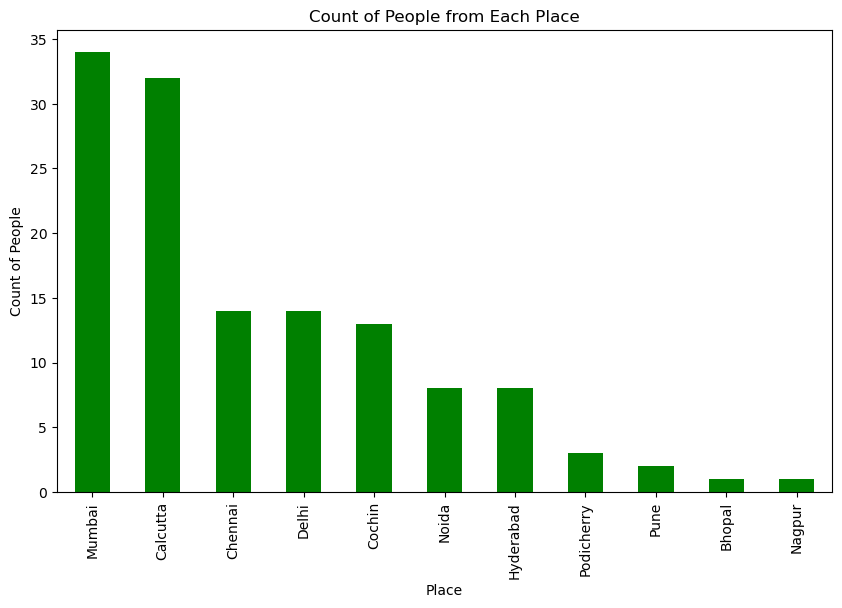


Data after One-hot Encoding:
    Company   Age       Salary Country  Place_Calcutta  Place_Chennai  \
0      TCS  20.0  5283.471074   India           False           True   
1  Infosys  30.0  5283.471074   India           False          False   
2      TCS  35.0  2300.000000   India            True          False   
3  Infosys  40.0  3000.000000   India           False          False   
4      TCS  23.0  4000.000000   India           False          False   

   Place_Cochin  Place_Delhi  Place_Hyderabad  Place_Mumbai  Place_Nagpur  \
0         False        False            False         False         False   
1         False        False            False          True         False   
2         False        False            False         False         False   
3         False         True            False         False         False   
4         False        False            False          True         False   

   Place_Noida  Place_Podicherry  Place_Pune  Gender_1  
0        False  

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Load the dataset

data = pd.read_csv("C:\\Users\\User\\Downloads\\Employee.csv")

# Strip any extra spaces from column names
data.columns = data.columns.str.strip()

# 1. Data Exploration

# List unique values in each feature
unique_values = {col: data[col].unique() for col in data.columns}
print("Unique Values in Each Feature:\n", unique_values)

# Find the length of unique values in each feature
unique_lengths = {col: len(data[col].unique()) for col in data.columns}
print("\nLength of Unique Values in Each Feature:\n", unique_lengths)

# Perform statistical analysis (summary statistics)
stat_summary = data.describe()
print("\nStatistical Summary:\n", stat_summary)

# 2. Data Cleaning

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

# Replace 0 in 'Age' column with NaN
data['Age'] = data['Age'].replace(0, pd.NA)

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Outlier detection using IQR (Interquartile Range)
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Salary'] < (Q1 - 1.5 * IQR)) | (data['Salary'] > (Q3 + 1.5 * IQR))]
print("\nOutliers in Salary:\n", outliers)

# Impute missing values (e.g., using median for 'Age' and mean for 'Salary')
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Salary'].fillna(data['Salary'].mean(), inplace=True)

# 3. Data Analysis

# Filter data with Age > 40 and Salary < 5000
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
print("\nFiltered Data (Age > 40 and Salary < 5000):\n", filtered_data)

# Plot Age vs Salary
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Salary'], alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

# Count the number of people from each place
place_counts = data['Place'].value_counts()
print("\nCount of People from Each Place:\n", place_counts)

# Plot the count of people from each place
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar', color='green')
plt.xlabel('Place')
plt.ylabel('Count of People')
plt.title('Count of People from Each Place')
plt.show()

# 4. Data Encoding

# One-hot encoding for categorical variables (e.g., 'Place' and 'Gender')
data_encoded = pd.get_dummies(data, columns=['Place', 'Gender'], drop_first=True)
print("\nData after One-hot Encoding:\n", data_encoded.head())

# Label encoding for binary columns (e.g., 'Gender')
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
print("\nData after Label Encoding (Gender):\n", data.head())

# 5. Feature Scaling

# Standard Scaling
scaler_standard = StandardScaler()
data_scaled_standard = data.copy()
data_scaled_standard[['Age', 'Salary']] = scaler_standard.fit_transform(data[['Age', 'Salary']])
print("\nData after Standard Scaling:\n", data_scaled_standard.head())

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_scaled_minmax = data.copy()
data_scaled_minmax[['Age', 'Salary']] = scaler_minmax.fit_transform(data[['Age', 'Salary']])
print("\nData after Min-Max Scaling:\n", data_scaled_minmax.head())

